<a href="https://colab.research.google.com/github/Soniartha/My_Strategy_Trading_Soniartha/blob/main/BTC_USD_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import pandas_datareader as web

In [9]:
df = web.DataReader('BTC-USD', data_source='yahoo', start= '2020-01-01', end = '2020-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383
...,...,...,...,...,...,...
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,4.905674e+10,27084.808594
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,4.526595e+10,27362.437500
2020-12-30,28937.740234,27360.089844,27360.089844,28840.953125,5.128744e+10,28840.953125


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 363 entries, 2020-01-01 to 2021-01-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       363 non-null    float64
 1   Low        363 non-null    float64
 2   Open       363 non-null    float64
 3   Close      363 non-null    float64
 4   Volume     363 non-null    float64
 5   Adj Close  363 non-null    float64
dtypes: float64(6)
memory usage: 19.9 KB


In [11]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,363.000000,363.000000,363.000000,363.000000,3.630000e+02,363.000000
mean,11365.305540,10902.702039,11115.244091,11176.069783,3.198280e+10,11176.069783
std,4484.492179,4242.084462,4322.854532,4423.316802,1.141374e+10,4423.316802
min,5331.833984,4106.980957,5002.578125,4970.788086,1.225260e+10,4970.788086
25%,9040.747070,8708.710938,8867.222656,8883.569336,2.307269e+10,8883.569336
50%,9836.369141,9539.818359,9691.230469,9700.414062,3.128816e+10,9700.414062
75%,11803.060547,11479.337402,11679.506348,11696.665527,3.967413e+10,11696.665527
max,29600.626953,28803.585938,28994.009766,29374.152344,7.415677e+10,29374.152344


In [12]:
#check for missing value
df.isnull().sum()/len(df)

High         0.0
Low          0.0
Open         0.0
Close        0.0
Volume       0.0
Adj Close    0.0
dtype: float64

In [13]:
null_data = df[pd.isnull(df).any(axis=1)]
null_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show>

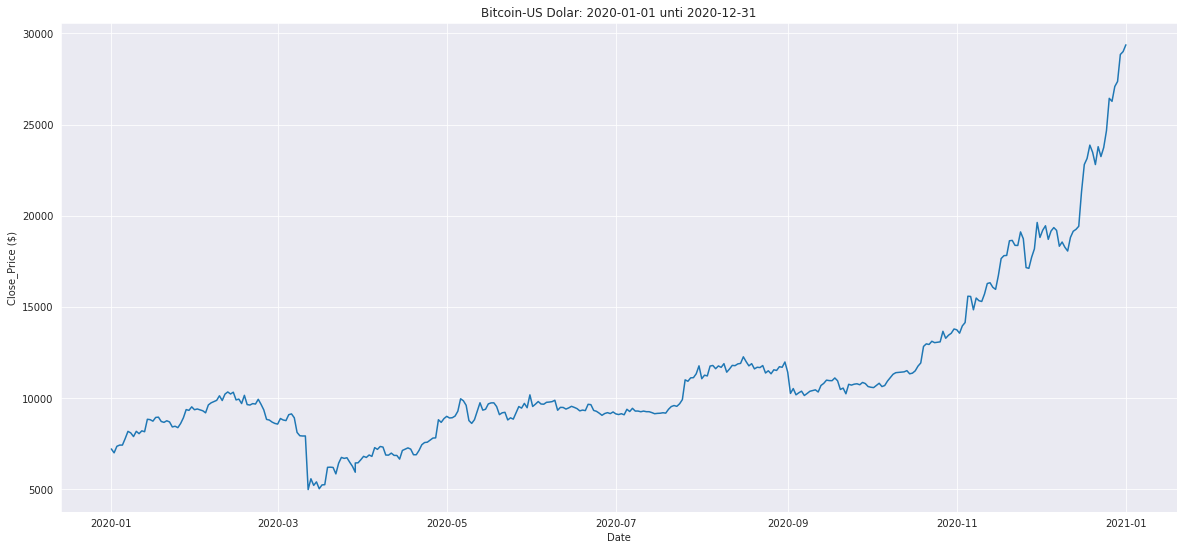

In [15]:
plt.figure(figsize=(20,9))
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel('Close_Price ($)')
plt.title('Bitcoin-US Dolar: 2020-01-01 unti 2020-12-31')
plt.plot(df.Close)
plt.show

<function matplotlib.pyplot.show>

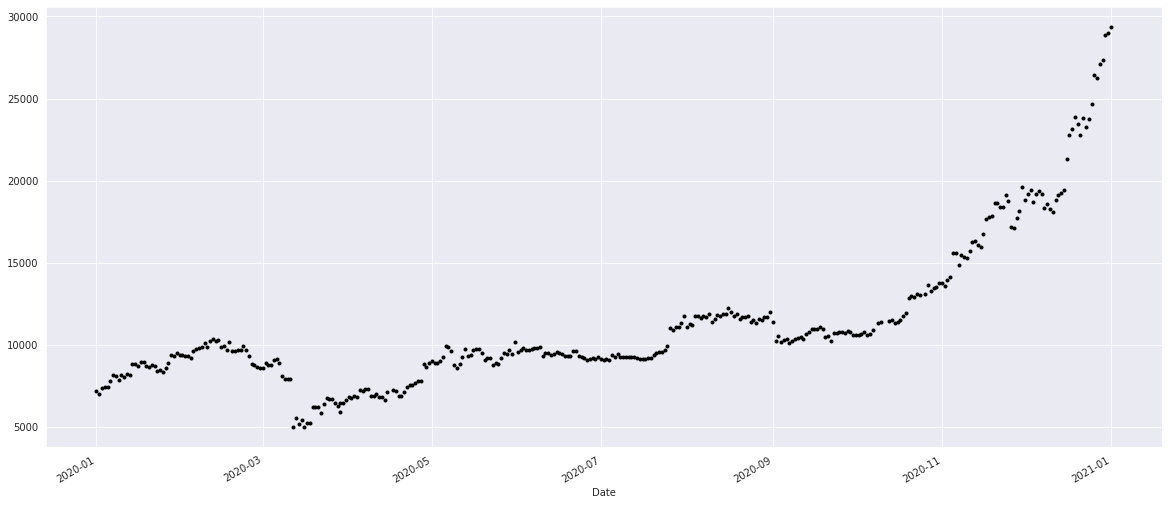

In [16]:
df_close = df['Close']
df_adjClose = df['Adj Close']
sns.set_style('darkgrid')
plt.figure(figsize=(20,9))
df_adjClose.plot(style = 'k.')
plt.show

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1440x720 with 0 Axes>

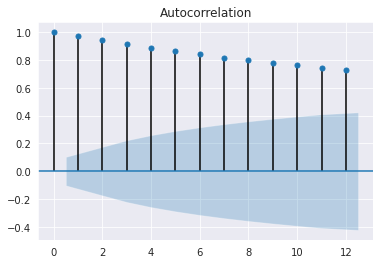

In [18]:
plt.figure(figsize=(20,10))
plot_acf(df_close, lags=12)
plt.show()

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf

<Figure size 1440x720 with 0 Axes>

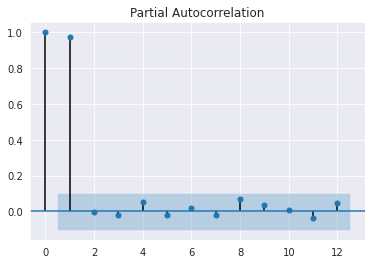

In [20]:
plt.figure(figsize=(20,10))
plot_pacf(df_close, lags=12)
plt.show()

In [21]:
#Check if data is stationary or not, so we perform Augmented-Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

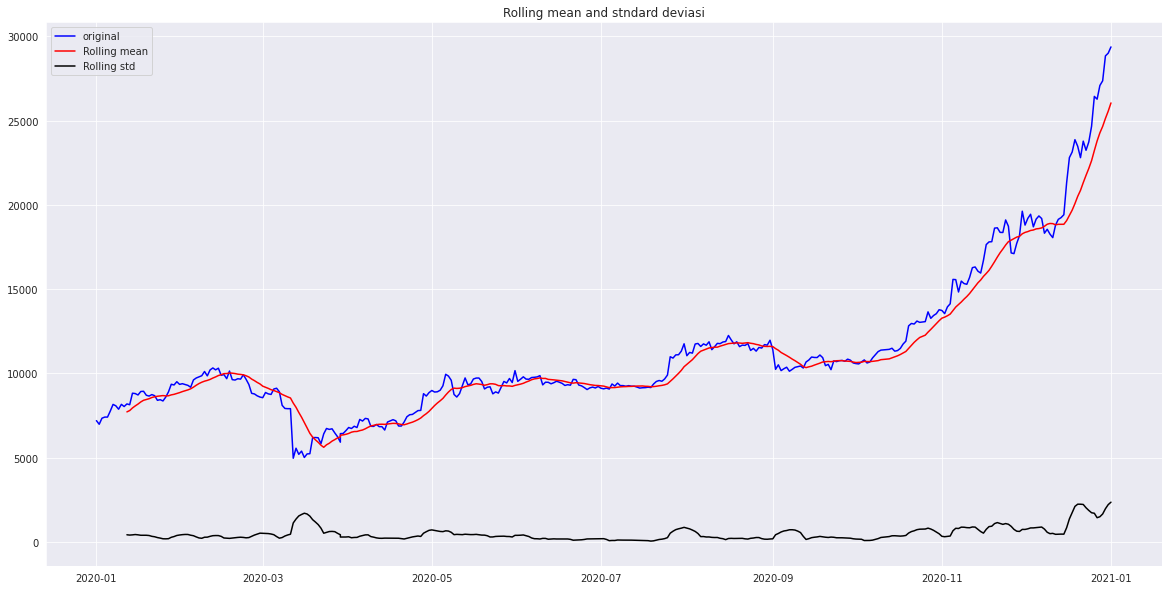

Result of dickey fuller test
Test Statistics                 3.868874
p-value                         1.000000
No. of lags used                0.000000
Number of Observation used    362.000000
Critical Value (1%)            -3.448544
Critical Value (5%)            -2.869557
Critical Value (10%)           -2.571041
dtype: float64


In [22]:
def test_adf(timeseries):
  moving_average = timeseries.rolling(12).mean()
  moving_std = timeseries.rolling(12).std()
  plt.figure(figsize=(20,10))
  plt.plot(timeseries, color = 'blue', label = 'original')
  plt.plot(moving_average, color = 'red', label = 'Rolling mean')
  plt.plot(moving_std, color = 'black', label = 'Rolling std')
  plt.legend(loc='best')
  plt.title('Rolling mean and stndard deviasi')
  plt.show(block=False)
  print("Result of dickey fuller test")
  adft = adfuller(timeseries, autolag = 'AIC')
  output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of Observation used'])
  for key, value in adft[4].items():
    output['Critical Value (%s)' %key] = value
  print(output)

test_adf(df_close)

In [23]:
#so p-value >0.05, so we fail to reject null hypotesis, anf test statistic is greater than critical values meaning data is not Stationary
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

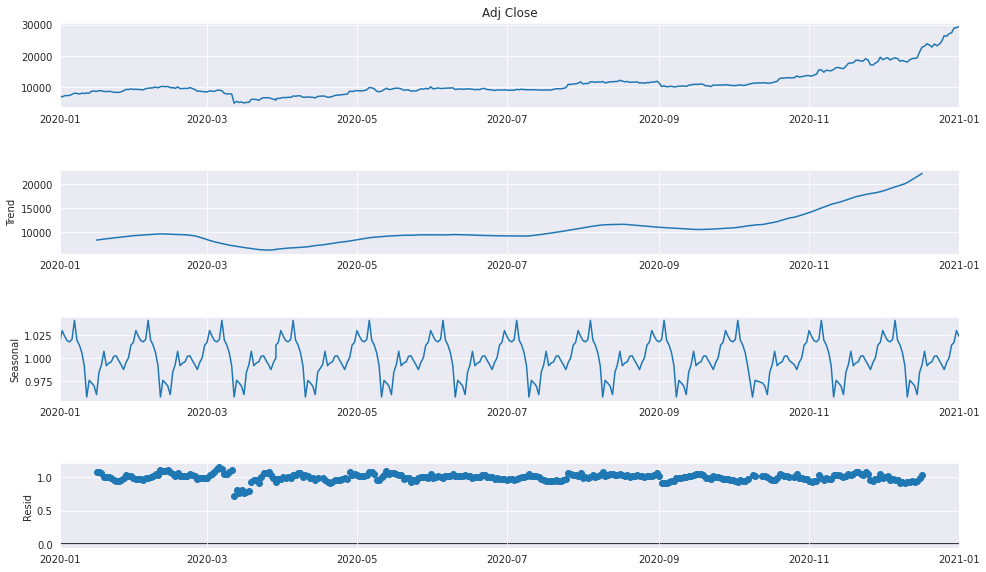

In [24]:
result = seasonal_decompose(df_adjClose, model='multiplicative', freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

No handles with labels found to put in legend.


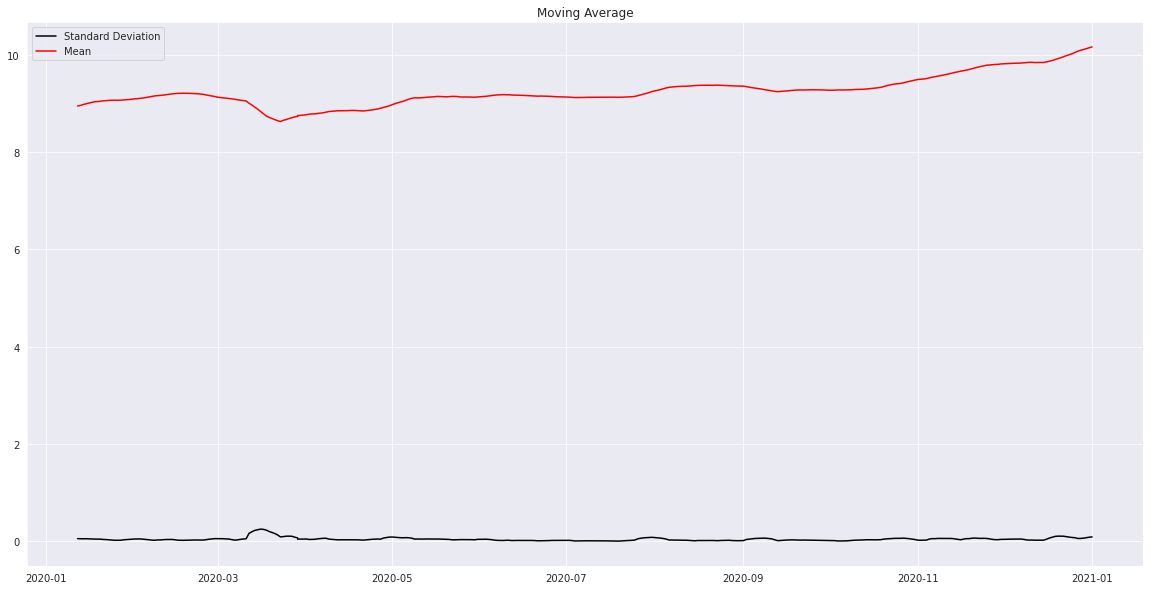

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10
df_adjClose_log = np.log(df_adjClose)
moving_average = df_adjClose_log.rolling(12).mean()
std_dev = df_adjClose_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color = 'black', label = 'Standard Deviation')
plt.plot(moving_average, color='red', label = 'Mean')
plt.legend()
plt.show()

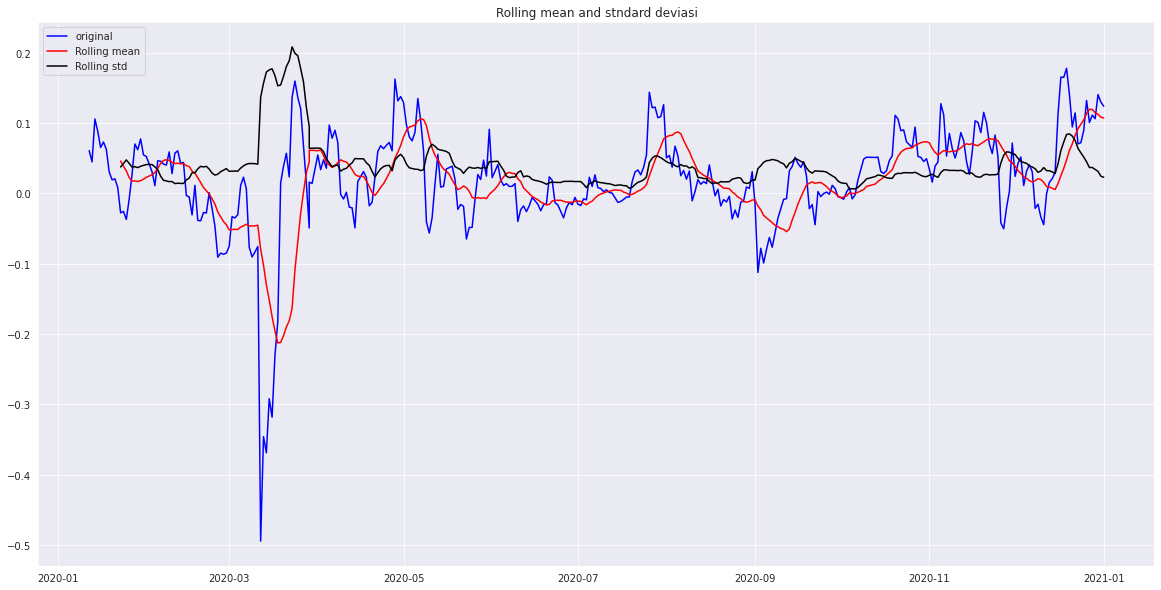

Result of dickey fuller test
Test Statistics                -2.841833
p-value                         0.052542
No. of lags used               11.000000
Number of Observation used    340.000000
Critical Value (1%)            -3.449730
Critical Value (5%)            -2.870079
Critical Value (10%)           -2.571319
dtype: float64


In [26]:
df_log_minus_mean = df_adjClose_log - moving_average      #One technique to make time series Stationary
df_log_minus_mean.dropna(inplace=True)
test_adf(df_log_minus_mean)

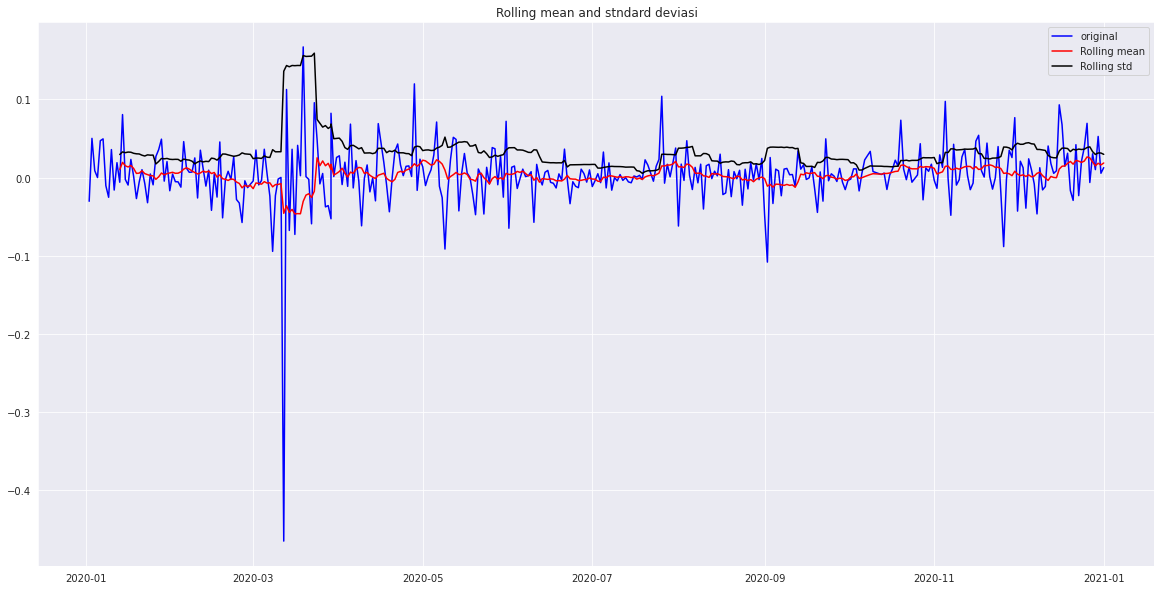

Result of dickey fuller test
Test Statistics              -8.612981e+00
p-value                       6.401140e-14
No. of lags used              3.000000e+00
Number of Observation used    3.580000e+02
Critical Value (1%)          -3.448749e+00
Critical Value (5%)          -2.869647e+00
Critical Value (10%)         -2.571089e+00
dtype: float64


In [27]:
df_log_shift = df_adjClose_log - df_adjClose_log.shift()    #other techniques to make timeseries Stationary
df_log_shift.dropna(inplace=True)
test_adf(df_log_shift)

In [28]:
df['Adj Close'] = df_adjClose_log

In [29]:
df['Adj Close']

Date
2020-01-01     8.881861
2020-01-02     8.851588
2020-01-03     8.901759
2020-01-04     8.910674
2020-01-05     8.910763
                ...    
2020-12-28    10.206728
2020-12-29    10.216926
2020-12-30    10.269552
2020-12-31    10.275110
2021-01-01    10.287870
Name: Adj Close, Length: 363, dtype: float64

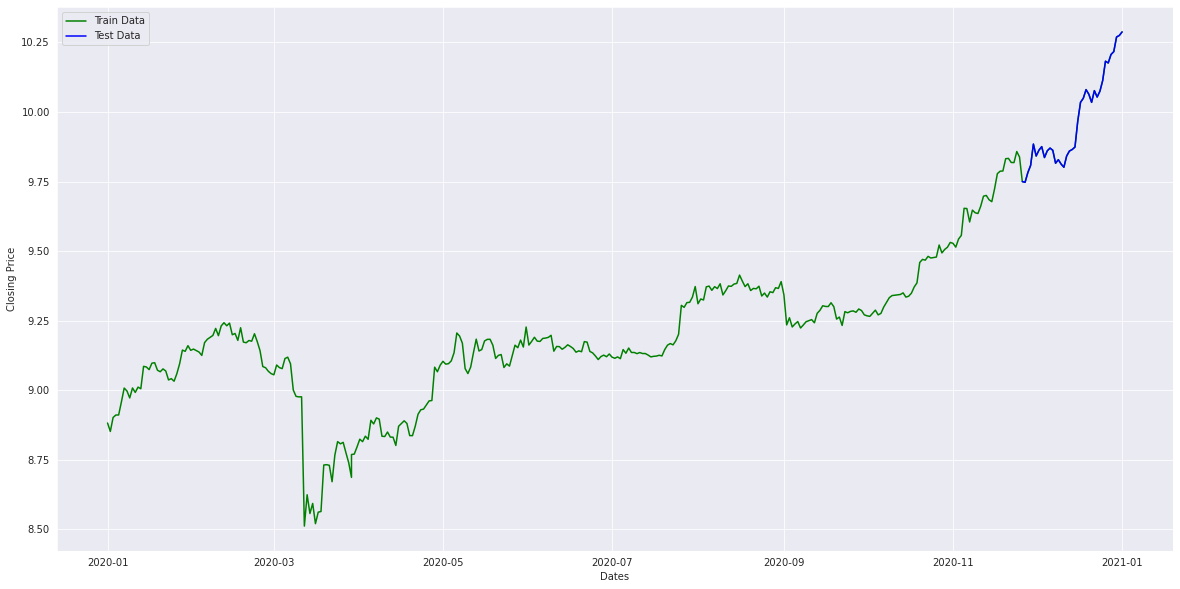

In [30]:
train_data, test_data = df_adjClose_log[:int(len(df_adjClose_log) * .9)], df_adjClose_log[int(len(df_adjClose_log) * .9):]
plt.figure(figsize=(20,10))
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(df_adjClose_log, color= 'green', label='Train Data')
plt.plot(test_data, color= 'blue', label = 'Test Data')
plt.legend(loc='best')
plt.show()

In [31]:
train_data

Date
2020-01-01    8.881861
2020-01-02    8.851588
2020-01-03    8.901759
2020-01-04    8.910674
2020-01-05    8.910763
                ...   
2020-11-21    9.833185
2020-11-22    9.818474
2020-11-23    9.818154
2020-11-24    9.857834
2020-11-25    9.837995
Name: Adj Close, Length: 326, dtype: float64

In [32]:
!pip install pmdarima

In [33]:
from pmdarima.arima import auto_arima

In [34]:
model_autoArima = auto_arima(train_data, start_p= 0, start_q=0,
                             test = 'adf',
                             max_p = 7,
                             max_q=7,
                             m=1,
                             d=None,
                             seasonal=False,
                             start_P = 0,
                             D = 0,
                             trace = True,
                             error_action = 'ignore',
                             suppress_warnings = True,
                             stepwise = True
                             )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1156.552, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1161.740, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1160.717, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1156.849, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1161.974, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1162.351, Time=0.21 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1166.471, Time=0.41 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-1165.147, Time=0.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1164.967, Time=1.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1163.385, Time=0.64 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1163.145, Time=0.49 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-1166.727, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-1162.063, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=-1165.547, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0

In [36]:
print(model_autoArima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  326
Model:               SARIMAX(4, 1, 0)   Log Likelihood                 588.364
Date:                Sat, 20 Mar 2021   AIC                          -1166.727
Time:                        09:15:57   BIC                          -1147.808
Sample:                             0   HQIC                         -1159.177
                                - 326                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1107      0.045     -2.433      0.015      -0.200      -0.022
ar.L2          0.0676      0.085      0.792      0.428      -0.100       0.235
ar.L3         -0.0619      0.072     -0.859      0.3

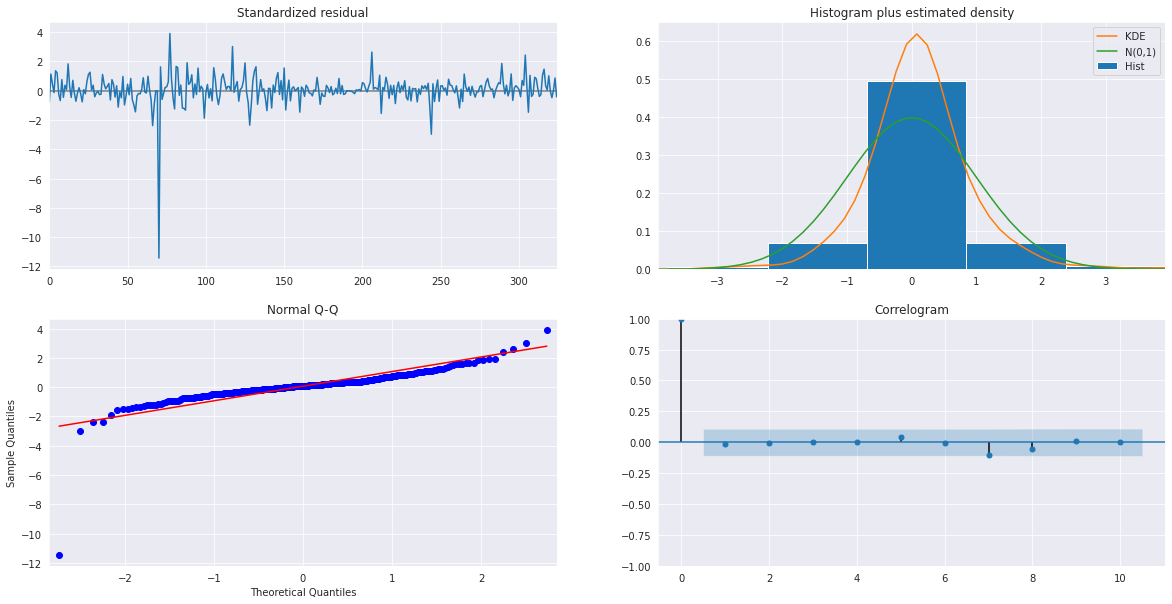

In [37]:
model_autoArima.plot_diagnostics(figsize=(20,10))
plt.show()

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
model = ARIMA(train_data, order=(0,1,0))
fitted = model.fit(disp=-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [40]:
df_adjClose_log

Date
2020-01-01     8.881861
2020-01-02     8.851588
2020-01-03     8.901759
2020-01-04     8.910674
2020-01-05     8.910763
                ...    
2020-12-28    10.206728
2020-12-29    10.216926
2020-12-30    10.269552
2020-12-31    10.275110
2021-01-01    10.287870
Name: Adj Close, Length: 363, dtype: float64

In [41]:
test_data.shape

(37,)

In [48]:
fc, se, conf = fitted.forecast(37, alpha=0.05)

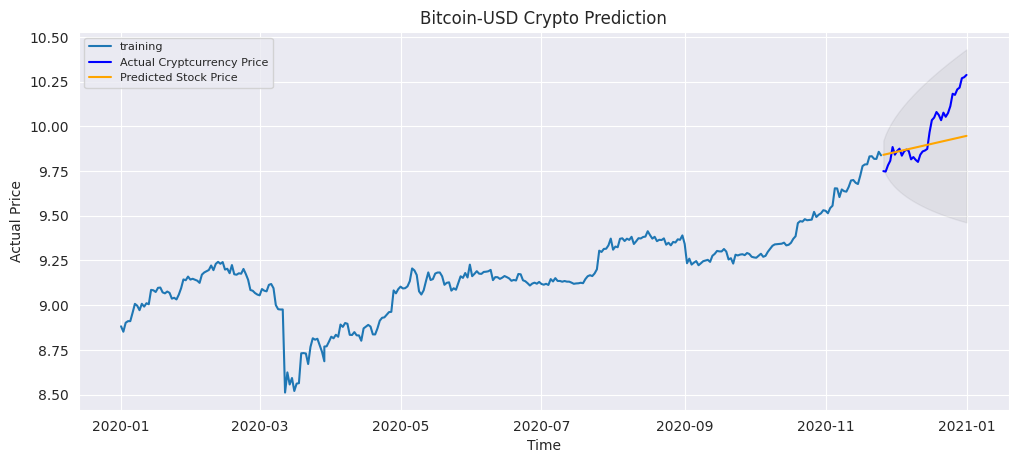

In [49]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:,0], index= test_data.index)
upper_series = pd.Series(conf[:,1], index=test_data.index)
plt.figure(figsize=(12,5), dpi = 100)
plt.plot(train_data, label ='training')
plt.plot(test_data, color= 'blue', label = 'Actual Cryptcurrency Price')
plt.plot(fc_series, color = 'orange', label = 'Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha = .05)
plt.title('Bitcoin-USD Crypto Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Price')
plt.legend(loc='upper left', fontsize = 8)
plt.show()

In [50]:
import math 
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [51]:
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data,fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.023471494258589937
MAE: 0.11525731869833826
RMSE: 0.15320409347856845
MAPE: 0.011416302970398723
